## Анализ тональности (sentiment analysis) на основе отзывов на фильмы IMDB
а) рекуррентная нейронная сеть


In [13]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Загружаем данные

In [14]:
max_words=10000

In [15]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

## Подготовка данных для обучения

In [16]:
maxlen = 200

In [17]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [18]:
x_train[5002]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,  103,   51,   13,  197,   16,    6, 4796,
        239,    7,  107,  555,   11,  132,   39,    2, 1872,  138,   16,
       4093, 1768, 2959,   34, 1620,    2,   11,    4,  755,   12,   43,
        286,    4,  172,  209,    2,    5,    2,   17, 1000,   34, 1768,
        279,   29, 3892,   89,  338,    4,  114,   16, 1240, 1747,  103,
       3844, 3819,    8,  169, 2875,  112,    2,   34,  160,  132,   29,
        100,   24,  535,  101,  250,    8,  858,   15,  196,   19,   57,
       3154,   39,   90,    5,   24,  169, 3533,   

## Создание нейронной сети

In [19]:
model = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(SimpleRNN(10))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [21]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 11s 60ms/step - loss: 0.6924 - accuracy: 0.5143 - val_loss: 0.6909 - val_accuracy: 0.5214
Epoch 2/10
157/157 [==============================] - 10s 66ms/step - loss: 0.6832 - accuracy: 0.5679 - val_loss: 0.6871 - val_accuracy: 0.5438
Epoch 3/10
157/157 [==============================] - 8s 48ms/step - loss: 0.6666 - accuracy: 0.6095 - val_loss: 0.6833 - val_accuracy: 0.5430
Epoch 4/10
157/157 [==============================] - 9s 56ms/step - loss: 0.6442 - accuracy: 0.6409 - val_loss: 0.6825 - val_accuracy: 0.5560
Epoch 5/10
157/157 [==============================] - 7s 47ms/step - loss: 0.6182 - accuracy: 0.6719 - val_loss: 0.6904 - val_accuracy: 0.5552
Epoch 6/10
157/157 [==============================] - 9s 55ms/step - loss: 0.5928 - accuracy: 0.6924 - val_loss: 0.6985 - val_accuracy: 0.5650
Epoch 7/10
157/157 [==============================] - 9s 57ms/step - loss: 0.5686 - accuracy: 0.7140 - val_loss: 0.6960 - val_accuracy: 0.57

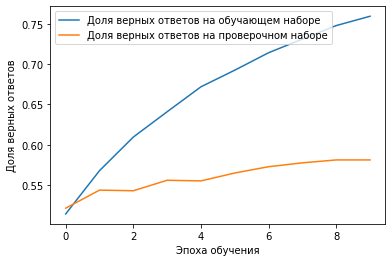

In [22]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [23]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 9s 11ms/step - loss: 0.7440 - accuracy: 0.5814


In [24]:
model = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(SimpleRNN(15))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [26]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=8,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/8
157/157 [==============================] - 11s 58ms/step - loss: 0.6923 - accuracy: 0.5160 - val_loss: 0.6858 - val_accuracy: 0.5568
Epoch 2/8
157/157 [==============================] - 9s 58ms/step - loss: 0.6152 - accuracy: 0.6809 - val_loss: 0.5905 - val_accuracy: 0.7142
Epoch 3/8
157/157 [==============================] - 8s 48ms/step - loss: 0.5099 - accuracy: 0.7693 - val_loss: 0.5115 - val_accuracy: 0.7586
Epoch 4/8
157/157 [==============================] - 9s 56ms/step - loss: 0.4184 - accuracy: 0.8235 - val_loss: 0.4048 - val_accuracy: 0.8294
Epoch 5/8
157/157 [==============================] - 9s 58ms/step - loss: 0.3587 - accuracy: 0.8551 - val_loss: 0.3897 - val_accuracy: 0.8332
Epoch 6/8
157/157 [==============================] - 8s 49ms/step - loss: 0.3284 - accuracy: 0.8684 - val_loss: 0.3597 - val_accuracy: 0.8512
Epoch 7/8
157/157 [==============================] - 9s 58ms/step - loss: 0.2988 - accuracy: 0.8808 - val_loss: 0.3593 - val_accuracy: 0.8494
Epoch

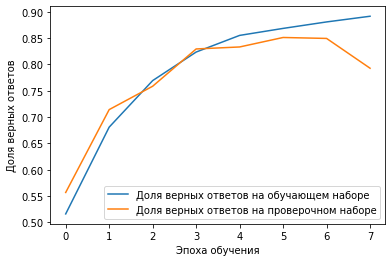

In [27]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [28]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 9s 12ms/step - loss: 0.5759 - accuracy: 0.7894
